<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥MALARIA DETECTION USING CNN🔥🔥
</div>


![](https://www.mdpi.com/diagnostics/diagnostics-10-00744/article_deploy/html/images/diagnostics-10-00744-g004.png)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥IMPORTING LIBRARIES🔥🔥
</div>


In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import kerastuner as kt

2024-04-16 10:35:15.318892: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 10:35:15.319020: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 10:35:15.433318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_34/1181463992.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥BASE_PATH AND FOLDERS READING🔥🔥
</div>


In [2]:
base_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/"

In [3]:
parasitized_path = os.path.join(base_path, "Parasitized")
uninfected_path = os.path.join(base_path, "Uninfected")

In [4]:
def load_and_resize_images(folder_path, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith(".png"):
            try:
                image = Image.open(os.path.join(folder_path, filename))
                # Resize the image to the target size
                image = image.resize(target_size)
                # Convert the image to a numpy array
                image_array = np.array(image)
                images.append(image_array)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    return images, labels

In [5]:
# Load and resize images from Parasitized folder
parasitized_images, parasitized_labels = load_and_resize_images(parasitized_path, label=0)

# Load and resize images from Uninfected folder
uninfected_images, uninfected_labels = load_and_resize_images(uninfected_path, label=1)

# Concatenate the lists of images and labels
images = parasitized_images + uninfected_images
labels = parasitized_labels + uninfected_labels


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥LIST TO ARRAY CONVERSION🔥🔥
</div>


In [6]:
# Convert lists to NumPy arrays
image_data = np.array(images)
label_data = np.array(labels)

# Check the shape of the image data
print("Image data shape:", image_data.shape)


Image data shape: (27558, 100, 100, 3)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥SAMPLE IMAGES🔥🔥
</div>


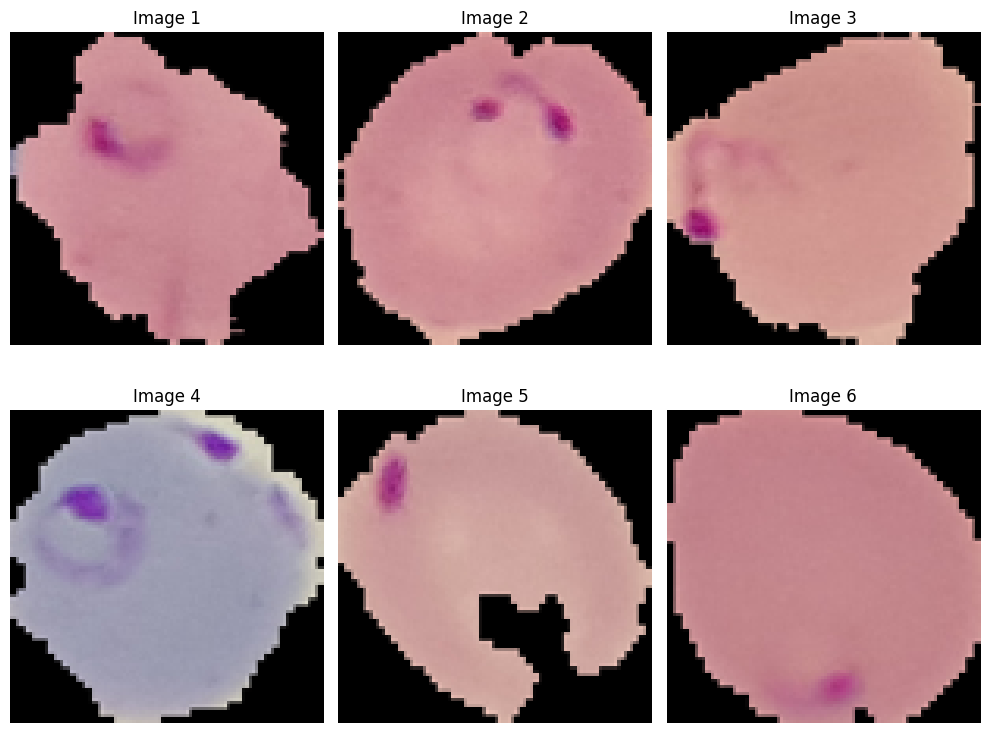

In [7]:
from matplotlib import pyplot as plt
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

axes = axes.ravel()

for i in range(rows * cols):
    axes[i].imshow(image_data[i])  
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')  


plt.tight_layout()
plt.show()

In [10]:
"""# Normalize image data
normalized_image_data = image_data / 255.0

# Check the shape of the normalized image data
print("Normalized image data shape:", normalized_image_data.shape)

# Reshape the image data to match the expected input shape of the model
reshaped_image_data = normalized_image_data.reshape(-1, 300, 300, 3)

# Check the shape of the reshaped image data
print("Reshaped image data shape:", reshaped_image_data.shape)"""

'# Normalize image data\nnormalized_image_data = image_data / 255.0\n\n# Check the shape of the normalized image data\nprint("Normalized image data shape:", normalized_image_data.shape)\n\n# Reshape the image data to match the expected input shape of the model\nreshaped_image_data = normalized_image_data.reshape(-1, 300, 300, 3)\n\n# Check the shape of the reshaped image data\nprint("Reshaped image data shape:", reshaped_image_data.shape)'

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥DATA SHUFFLING🔥🔥
</div>


In [11]:
combined_data = list(zip(image_data, label_data))
np.random.shuffle(combined_data)
shuffled_image_data, shuffled_label_data = zip(*combined_data)

# Convert to NumPy arrays
shuffled_image_data = np.array(shuffled_image_data)
shuffled_label_data = np.array(shuffled_label_data)

# Check the shape of the shuffled data
print("Shuffled image data shape:", shuffled_image_data.shape)
print("Shuffled label data shape:", shuffled_label_data.shape)

Shuffled image data shape: (27558, 100, 100, 3)
Shuffled label data shape: (27558,)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥TRAIN-TEST-SPLIT🔥🔥
</div>


In [12]:
train_images, val_images, train_labels, val_labels = train_test_split(shuffled_image_data, shuffled_label_data, test_size=0.2, random_state=42)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥NORMALIZAION🔥🔥
</div>


In [13]:
train_images = train_images / 255.0
val_images = val_images / 255.0

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥CNN MODEL ARCHITECTURE🔥🔥
</div>


In [14]:
def build_model(hp):
    model = keras.Sequential()
    
    # Tune the number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=1, max_value=3, step=1)
    for i in range(num_conv_layers):
        model.add(layers.Conv2D(filters=hp.Int(f'conv_{i}_filter', min_value=32, max_value=128, step=32),
                                kernel_size=(3, 3),
                                padding='same',
                                activation='relu',
                                input_shape=train_images.shape[1:]))
        model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    
    # Tune the number of dense layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=3, step=1)
    for i in range(num_dense_layers):
        model.add(layers.Dense(units=hp.Int(f'dense_{i}_unit', min_value=32, max_value=512, step=32),
                                activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    return model


In [15]:
tuner = kt.RandomSearch(build_model,
                         objective='val_accuracy',
                         max_trials=5,
                         directory='/kaggle/working/',
                         project_name='Detecting_Malaria')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
from keras.callbacks import EarlyStopping

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥HYPERTUNING🔥🔥
</div>


In [17]:
tuner.search(train_images, train_labels, epochs=100, validation_data=(val_images, val_labels), callbacks=[early_stopping])

Trial 5 Complete [00h 03m 30s]
val_accuracy: 0.49746009707450867

Best val_accuracy So Far: 0.9591799974441528
Total elapsed time: 00h 12m 54s


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥BEST MODEL🔥🔥
</div>


In [18]:
best_model = tuner.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [19]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 96)   │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 448)            │     2,064,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 384)            │       172,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 416)            │       160,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           417 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,337 (9.44 MB)

 Trainable params: 2,474,337 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥EVALUATION🔥🔥
</div>


In [20]:
val_loss, val_acc = best_model.evaluate(val_images, val_labels)

 22/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9380 - loss: 0.1826

W0000 00:00:1713265314.271248      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9534 - loss: 0.1516


W0000 00:00:1713265315.657376      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [21]:
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)


Validation Loss: 0.14007697999477386
Validation Accuracy: 0.9591799974441528


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥CNN MODEL PREDICTION🔥🔥
</div>


In [22]:
predictions = best_model.predict(val_images)

for i in range(min(5, len(val_images))):
    print("Predicted class probabilities for image", i+1, ":", predictions[i])

 34/173 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

W0000 00:00:1713265503.670839      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted class probabilities for image 1 : [0.9853471]
Predicted class probabilities for image 2 : [0.98723525]
Predicted class probabilities for image 3 : [0.96834475]
Predicted class probabilities for image 4 : [0.993741]
Predicted class probabilities for image 5 : [0.9870489]


W0000 00:00:1713265504.801599      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [23]:
predicted_labels = (predictions > 0.5).astype("int32")

for i in range(min(5, len(val_images))):
    print("Predicted label for image", i+1, ":", predicted_labels[i])


Predicted label for image 1 : [1]
Predicted label for image 2 : [1]
Predicted label for image 3 : [1]
Predicted label for image 4 : [1]
Predicted label for image 5 : [1]


In [32]:
class_mapping = {0: "Parasitized", 1: "Uninfected"}
predictions = best_model.predict(val_images)
predicted_labels = (predictions > 0.5).astype("int32")

actual_labels = [class_mapping[label] for label in val_labels]

additional_data = {
    "Actual Class Name": actual_labels,
    "Predicted Class Name": [class_mapping[label] for label in predicted_labels.flatten()]
}

data = {
    "Predicted Probabilities": predictions.flatten(),
    "Actual Labels": val_labels,
    "Predicted Labels": predicted_labels.flatten(),
    **additional_data  
}

df = pd.DataFrame(data)

#df.head(20).style.background_gradient()

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [37]:

styled_df = df.sample(30).style.set_properties(**{'text-align': 'center'}) \
                             .set_caption("Predictions and Actual Labels") \
                             .format({"Predicted Probabilities": "{:.4f}"}) \
                             .background_gradient(cmap='viridis', subset=["Predicted Probabilities"])
styled_df


,Predicted Probabilities,Actual Labels,Predicted Labels,Actual Class Name,Predicted Class Name
2599,0.9685,1,1,Uninfected,Uninfected
1970,0.0352,0,0,Parasitized,Parasitized
692,0.9532,1,1,Uninfected,Uninfected
1368,0.0000,0,0,Parasitized,Parasitized
4790,0.9548,1,1,Uninfected,Uninfected
1237,0.9924,1,1,Uninfected,Uninfected
1058,0.9895,1,1,Uninfected,Uninfected
1942,0.0137,0,0,Parasitized,Parasitized
4266,0.9930,1,1,Uninfected,Uninfected
2199,0.0000,0,0,Parasitized,Parasitized


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥SAVING THE CNN MODEL AND WEIGHTS🔥🔥
</div>


In [41]:
best_model.save('/kaggle/working/saved_model.h5')
best_model.save('/kaggle/working/model.h5')
model_json = best_model.to_json()
with open("/kaggle/working/model.json", "w") as json_file:
    json_file.write(model_json)

best_model.save_weights("/kaggle/working/model_weights.weights.h5")


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥PREDICTION ON SINGLE RANDOM IMAGE🔥🔥
</div>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


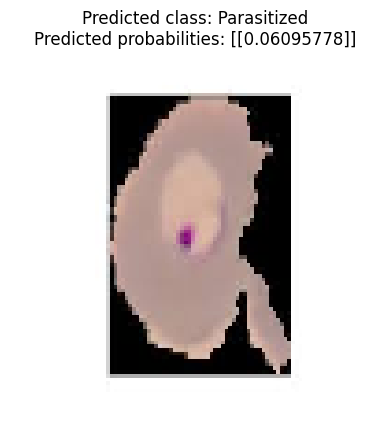

In [49]:
import matplotlib.pyplot as plt

def predict_single_image(model, image_path, threshold=0.5):
    img = load_and_preprocess_image(image_path)
    prediction = model.predict(img)
    class_name = "Parasitized" if prediction < threshold else "Uninfected"
    return img, class_name, prediction

def plot_image_with_prediction(image, class_name, prediction):

    image = image.squeeze()  
    plt.imshow(image)
    plt.title(f"Predicted class: {class_name}\nPredicted probabilities: {prediction}")
    plt.axis('off')   
    plt.show()

image_path = "/kaggle/input/sample-image/sample-image.jpeg"
img, class_name, prediction = predict_single_image(best_model, image_path)


plot_image_with_prediction(img, class_name, prediction)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   🔥🔥END🔥🔥
</div>


![](https://www.seekpng.com/png/detail/279-2793078_calligraphy-fonts-thank-you.png)